In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 38.6MB 604kB/s
     |████████████████████████████████| 10.1MB 4.0MB/s 
     |████████████████████████████████| 645kB 30.0MB/s 
     |████████████████████████████████| 112kB 45.5MB/s 
     |████████████████████████████████| 1.1MB 19.7MB/s 
     |████████████████████████████████| 3.1MB 31.1MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 296kB 34.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248502 sha256=045486de59680fc0a2be0b2a46997b1fab4de514ca620746ea9a9e91ad109c46
  Stored in directory: /tmp/pip-ephem-wheel-cache-5f5i4ap8/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=18247dde8588421e2ec0f7e7c093fa45d253dd54679a7f806cf3ebb38adbfd4b
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f9406

In [ ]:
!git clone https://github.com/GalGoldstein/box_office_revenue_prediction.git

Cloning into 'box_office_revenue_prediction'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 96 (delta 58), reused 64 (delta 28), pack-reused 0
Unpacking objects: 100% (96/96), done.


In [ ]:
!unzip box_office_revenue_prediction/hw1_data.zip

Archive:  box_office_revenue_prediction/hw1_data.zip
  inflating: test.tsv                
  inflating: train.tsv               
  inflating: predict.py              


In [ ]:
import pandas as pd
import ast
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas_profiling import ProfileReport

train = pd.read_csv('train.tsv', sep='\t')
train = train.set_index('id')
columns_to_remove = ['backdrop_path', 'homepage', 'imdb_id', 'poster_path', 'production_countries', 'status', 'video','spoken_languages' ]
textual_columns = ['original_title', 'overview', 'tagline', 'title', 'Keywords']

In [ ]:
train.drop(columns_to_remove, inplace=True, axis=1)

columns_to_dict = ['belongs_to_collection', 'genres', 'production_companies', 'Keywords', 'cast', 'crew']
for col in columns_to_dict:
    train[col] = train[col].apply(lambda x: ast.literal_eval(str(x)) if type(x) == str else x)

textual_df = train[textual_columns]
train.drop(textual_columns, inplace=True, axis=1)
train['budget'].replace({0: np.nan}, inplace=True)
train['runtime'].replace({0: np.nan}, inplace=True)
train["release_date"] = train["release_date"].astype("datetime64")
train = train[['revenue', 'budget', 'popularity','runtime','vote_average','vote_count','release_date','original_language',
              'belongs_to_collection','genres', 'production_companies','cast', 'crew']]
train.head()

,revenue,budget,popularity,runtime,vote_average,vote_count,release_date,original_language,belongs_to_collection,genres,production_companies,cast,crew
id,,,,,,,,,,,,,
559,890871626,258000000.0,22.024,139.0,6.2,8180,2007-05-01,en,"{'id': 556, 'name': 'Spider-Man Collection', '...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...","[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de..."
50719,154323,250000.0,4.756,88.0,4.3,68,1987-04-10,en,"{'id': 256296, 'name': 'Silent Night, Deadly N...","[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...","[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de..."
469062,176236,NaN,4.746,98.0,6.5,15,2018-07-27,en,NaN,"[{'id': 99, 'name': 'Documentary'}]","[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de..."
9003,14564027,1000000.0,13.828,94.0,6.9,1115,1987-09-11,en,"{'id': 8917, 'name': 'Hellraiser Collection', ...","[{'id': 27, 'name': 'Horror'}]","[{'id': 1950, 'logo_path': None, 'name': 'New ...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de..."
11153,61399552,15000000.0,15.070,99.0,7.1,782,1983-07-28,en,"{'id': 108693, 'name': 'National Lampoon's Vac...","[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...","[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de..."


In [ ]:
sns.set_style('darkgrid')
colors = ['#851836', '#EDBD17', '#0E1428', '#407076', '#4C5B61']
sns.set_palette(sns.color_palette(colors))

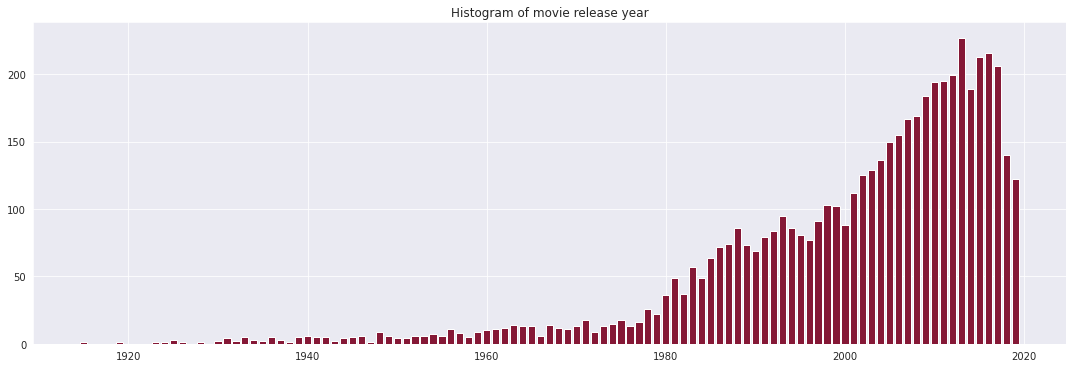

In [ ]:
# dates chart

fig, ax = plt.subplots(figsize=(15,5))
years_hist = train["release_date"].groupby([train["release_date"].dt.year]).count()
plt.bar(years_hist.index, years_hist.values)
plt.tight_layout()
plt.title(f'Histogram of movie release year')
plt.show()    

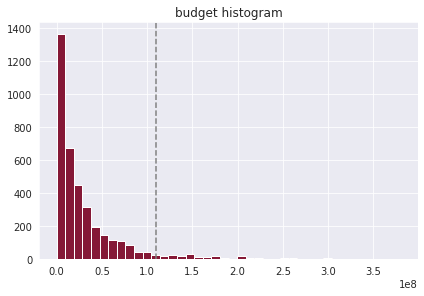

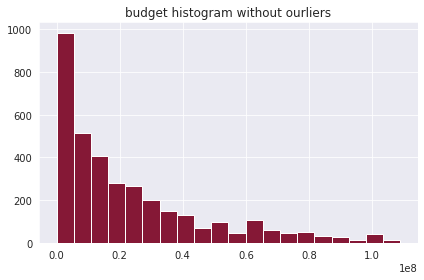

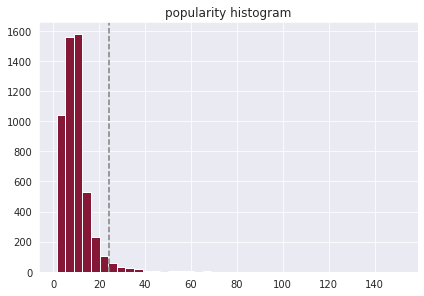

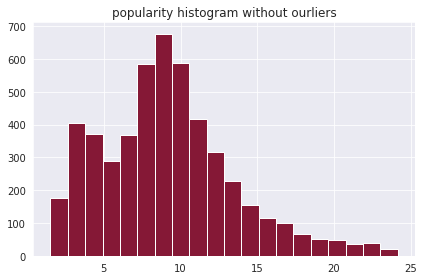

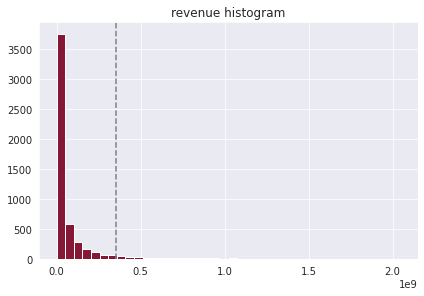

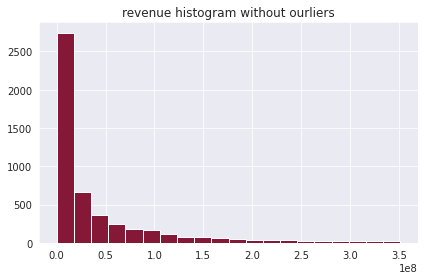

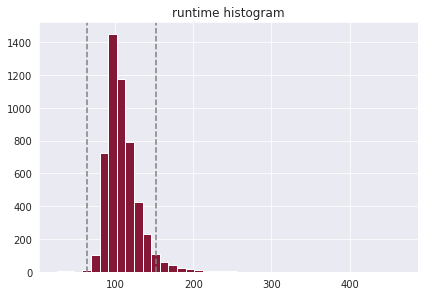

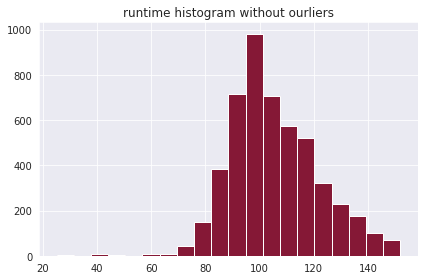

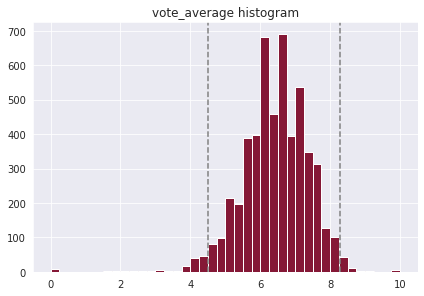

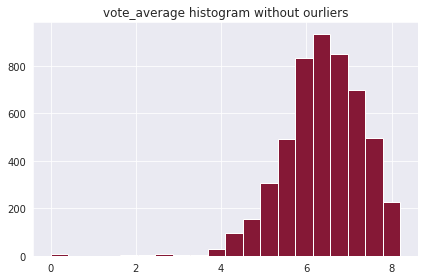

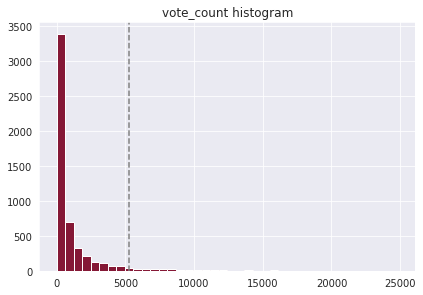

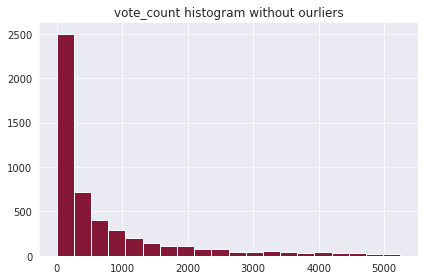

In [ ]:
# hists with/out outliars

numerical = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in numerical:
    threshold = np.mean(train[col]) + 2 * np.std(train[col])
    col_for_hist=[i for i in train[col] if i < threshold]
    train[col].hist(bins=40)
    plt.tight_layout()
    plt.title(f'{col} histogram')
    plt.axvline(x=threshold, c='grey', linestyle='--')
    if col in ['runtime', 'vote_average']:
      plt.axvline(x=np.mean(train[col]) - 2 * np.std(train[col]), c='grey', linestyle='--')
    plt.show()    

    plt.hist(col_for_hist, bins=20)
    plt.title(f'{col} histogram without ourliers')
    plt.tight_layout()
    plt.show()
    print('\n\n\n')

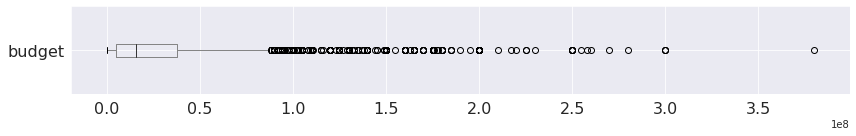

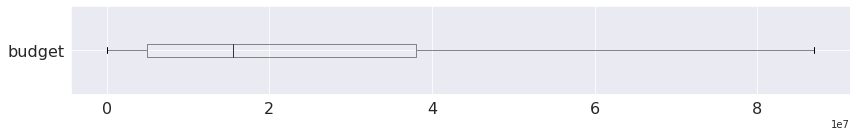

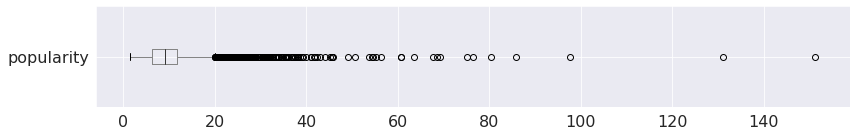

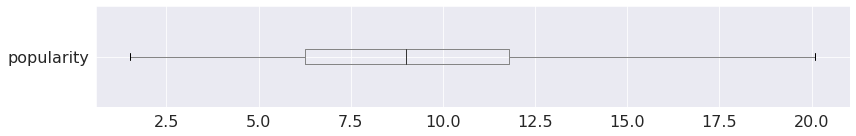

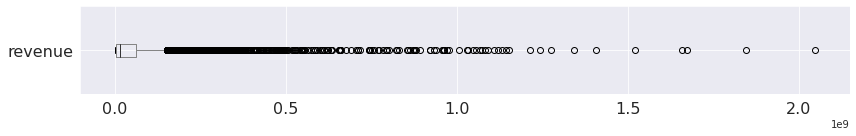

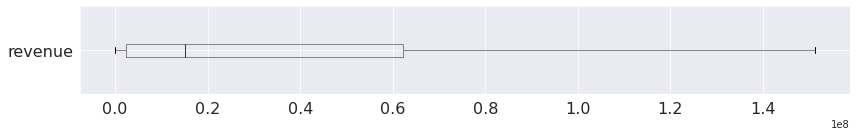

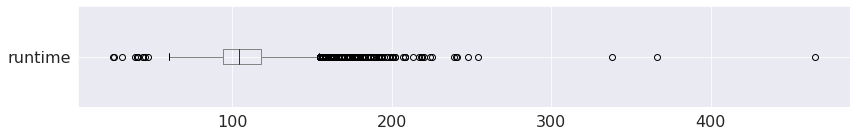

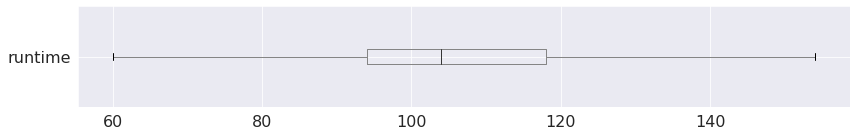

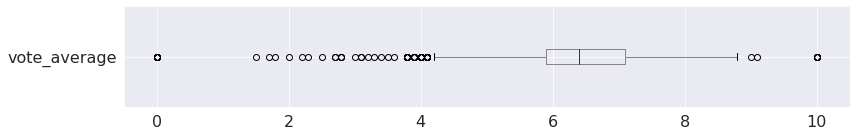

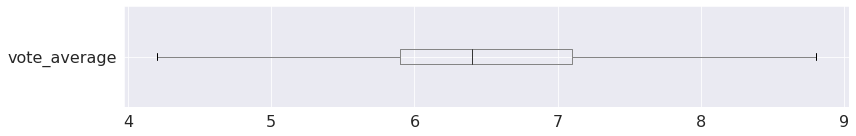

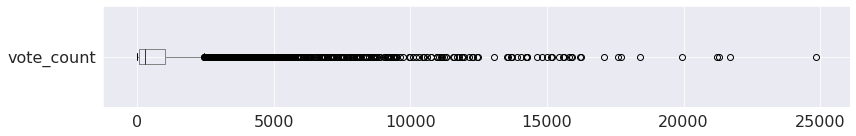

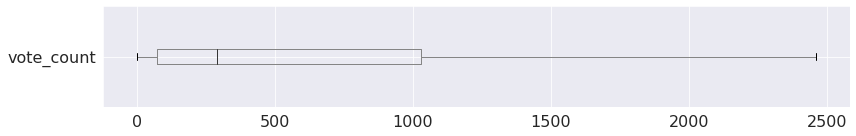

In [ ]:
# boxplots with/out outliars

for col in numerical:
    train[[col]].boxplot(figsize=(12,2), vert=False, fontsize=16)
    plt.tight_layout()
    plt.show()
    train[[col]].boxplot(figsize=(12,2), vert=False, showfliers=False, fontsize=16)
    plt.tight_layout()
    plt.show()
    print('\n\n\n')

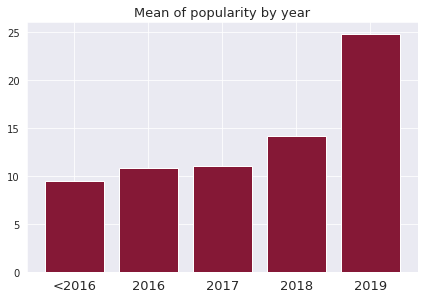

In [ ]:
import datetime
df_popularity_per_year = train.sort_values('release_date')
df_popularity_per_year = df_popularity_per_year.reset_index()

d_2016 = datetime.datetime(2016, 1, 1) 
d_2017 = datetime.datetime(2017, 1, 1)
d_2018 = datetime.datetime(2018, 1, 1)
d_2019 = datetime.datetime(2019, 1, 1)
d_2020 = datetime.datetime(2020, 1, 1)

df_under_2016 = df_popularity_per_year[(df_popularity_per_year['release_date'] < d_2016)]
df_2016 = df_popularity_per_year[(df_popularity_per_year['release_date'] > d_2016) & (df_popularity_per_year['release_date'] < d_2017)]
df_2017 = df_popularity_per_year[(df_popularity_per_year['release_date'] > d_2017) & (df_popularity_per_year['release_date'] < d_2018)]
df_2018 = df_popularity_per_year[(df_popularity_per_year['release_date'] > d_2018) & (df_popularity_per_year['release_date'] < d_2019)]
df_2019 = df_popularity_per_year[(df_popularity_per_year['release_date'] > d_2019) & (df_popularity_per_year['release_date'] < d_2020)]

# popolarity per year
fig, ax = plt.subplots()
plt.bar([i for i in range(5)], [df_under_2016['popularity'].mean(),
                                df_2016['popularity'].mean(),
                                df_2017['popularity'].mean(),
                                df_2018['popularity'].mean(),
                                df_2019['popularity'].mean()])

plt.tight_layout()
plt.title(f'Mean of popularity by year', fontsize=13)
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(['<2016', '2016','2017','2018','2019'], fontsize=13)


plt.show()    

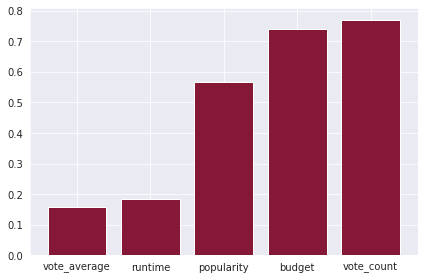

vote_average    0.159344
runtime         0.183450
popularity      0.567924
budget          0.741447
vote_count      0.769808
Name: revenue, dtype: float64


In [ ]:
# correlation between vars to revenue
fig, ax = plt.subplots()
corr_to_revenue = train.corr()['revenue'].sort_values().drop('revenue')
plt.bar(corr_to_revenue.index, corr_to_revenue.values)
plt.tight_layout()
# plt.title(f' histogram')
plt.show()    
print(corr_to_revenue)

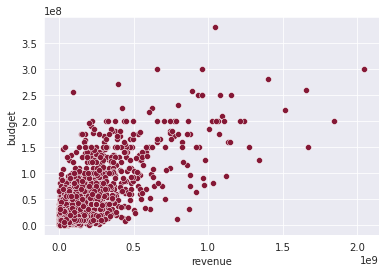

In [ ]:
sns.scatterplot(x="revenue", y='budget', data=train)

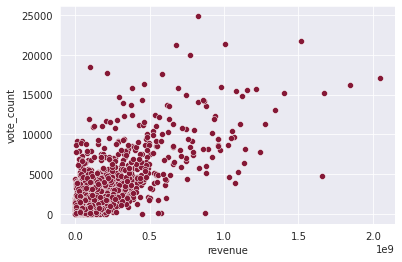

In [ ]:
sns.scatterplot(x="revenue", y='vote_count', data=train)

In [ ]:
# charts to the dicts objects
train = train.mask(train.isna(), None)

train['belongs_to_collection_name'] = train['belongs_to_collection'].apply(lambda x: x if x is None else x['name'])
train['belongs_to_collection_id'] = train['belongs_to_collection'].apply(lambda x: x if x is None else x['id'])
train['genres_name'] = train['genres'].apply(lambda x: x if x is None else [element['name'] for element in x])
train['genres_id'] = train['genres'].apply(lambda x: x if x is None else [element['id'] for element in x])
train['production_companies_name'] = train['production_companies'].apply(lambda x: x if x is None else [element['name'] for element in x])
train['production_companies_id'] = train['production_companies'].apply(lambda x: x if x is None else [element['id'] for element in x])
train['cast_name'] = train['cast'].apply(lambda x: x if x is None else [element['name'] for element in x])
train['cast_id'] = train['cast'].apply(lambda x: x if x is None else [element['cast_id'] for element in x])
jobs = ['Executive Producer', 'Producer', 'Director', 'Screenplay', 'Author']
train['crew_job'] = train['crew'].apply(lambda x: x if x is None else [element['job'] for element in x if element['job'] in jobs])
train['crew_name'] = train['crew'].apply(lambda x: x if x is None else [element['name'] for element in x if element['job'] in jobs])
train['crew_id'] = train['crew'].apply(lambda x: x if x is None else [element['id'] for element in x if element['job'] in jobs])

train.head()

,revenue,budget,popularity,runtime,vote_average,vote_count,release_date,original_language,belongs_to_collection,genres,production_companies,cast,crew,belongs_to_collection_name,belongs_to_collection_id,genres_name,genres_id,production_companies_name,production_companies_id,cast_name,cast_id,crew_job,crew_name,crew_id
id,,,,,,,,,,,,,,,,,,,,,,,,
559,890871626,2.58e+08,22.024,139,6.2,8180,2007-05-01,en,"{'id': 556, 'name': 'Spider-Man Collection', '...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...","[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",Spider-Man Collection,556.0,"[Fantasy, Action, Adventure]","[14, 28, 12]","[Marvel Enterprises, Columbia Pictures, Laura ...","[19551, 5, 326, 34]","[Tobey Maguire, Kirsten Dunst, James Franco, T...","[30, 7, 35, 36, 37, 8, 31, 9, 10, 14, 12, 13, ...","[Executive Producer, Screenplay, Director, Aut...","[Joseph M. Caracciolo Jr., Sam Raimi, Sam Raim...","[10570, 7623, 7623, 7624, 7624, 7625, 7627, 76..."
50719,154323,250000,4.756,88,4.3,68,1987-04-10,en,"{'id': 256296, 'name': 'Silent Night, Deadly N...","[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...","[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de...","Silent Night, Deadly Night Collection",256296.0,"[Comedy, Horror]","[35, 27]",[Silent Night Releasing Corporation],[18924],"[Eric Freeman, James Newman, Elizabeth Kaitan,...","[1000, 1071, 1005, 1006, 1007, 1008, 1009, 101...","[Screenplay, Director, Producer, Screenplay]","[Lee Harry, Lee Harry, Lawrence Appelbaum, Jos...","[213404, 213404, 213405, 213406]"
469062,176236,None,4.746,98,6.5,15,2018-07-27,en,None,"[{'id': 99, 'name': 'Documentary'}]","[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de...",None,NaN,[Documentary],[99],[Water's End Productions],[88564],"[Scotty Bowers, Peter Bart, William Mann, Robe...","[1, 0, 2, 3, 68, 69, 70]","[Producer, Executive Producer, Director, Execu...","[Josh Braun, Pierre Lagrange, Matt Tyrnauer, L...","[27710, 1046137, 1116251, 1479281, 1581913, 17..."
9003,14564027,1e+06,13.828,94,6.9,1115,1987-09-11,en,"{'id': 8917, 'name': 'Hellraiser Collection', ...","[{'id': 27, 'name': 'Horror'}]","[{'id': 1950, 'logo_path': None, 'name': 'New ...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de...",Hellraiser Collection,8917.0,[Horror],[27],"[New World Pictures, Cinemarque Entertainment ...","[1950, 15338, 15339, 15340]","[Andrew Robinson, Clare Higgins, Ashley Lauren...","[15, 16, 17, 18, 19, 20, 21, 22, 38, 41, 24, 2...","[Producer, Director, Executive Producer, Execu...","[Christopher Figg, Clive Barker, David Saunder...","[9000, 31211, 42129, 56546, 1629958]"
11153,61399552,1.5e+07,15.07,99,7.1,782,1983-07-28,en,"{'id': 108693, 'name': 'National Lampoon's Vac...","[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...","[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de...",National Lampoon's Vacation Collection,108693.0,"[Comedy, Adventure]","[35, 12]",[Warner Bros. Pictures],[174],"[Chevy Chase, Beverly D'Angelo, Imogene Coca, ...","[1, 2, 3, 4, 12, 24, 13, 14, 16, 17, 18, 19, 2...","[Director, Screenplay, Producer]","[Harold Ramis, John Hughes, Matty Simmons]","[1524, 11505, 69342]"


# Missing data

In [ ]:
train.isna().sum()

revenue                          0
budget                        1487
popularity                       0
runtime                         16
vote_average                     0
vote_count                       0
release_date                     0
original_language                0
belongs_to_collection         4150
genres                           0
production_companies             0
cast                             0
crew                             0
belongs_to_collection_name    4150
belongs_to_collection_id      4150
genres_name                      0
genres_id                        0
production_companies_name        0
production_companies_id          0
cast_name                        0
cast_id                          0
crew_job                         0
crew_name                        0
crew_id                          0
dtype: int64

In [ ]:
print(train.revenue.value_counts(dropna=False))
print(list(train.revenue.value_counts(dropna=False).sort_index().index))

10000000     15
1000000      14
12000000     14
2000000      13
11000000     13
             ..
6670680       1
29381956      1
125212904     1
99067206      1
2550321       1
Name: revenue, Length: 4849, dtype: int64
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 24, 27, 30, 35, 39, 40, 43, 44, 46, 50, 51, 58, 71, 73, 75, 79, 80, 83, 85, 88, 95, 112, 114, 125, 136, 152, 165, 172, 203, 211, 228, 230, 288, 303, 344, 388, 481, 500, 525, 537, 623, 641, 715, 854, 921, 1200, 1378, 1404, 1469, 1596, 1800, 1938, 2521, 2583, 2634, 2710, 2970, 3010, 3350, 3407, 3462, 3465, 3774, 3838, 4000, 4105, 4187, 4218, 4444, 4488, 4526, 4534, 4537, 4542, 4631, 4970, 5206, 5240, 5274, 5290, 5303, 5708, 5777, 5975, 5980, 6000, 6075, 6297, 6315, 6399, 6420, 6508, 6701, 6877, 6915, 6921, 7182, 7235, 7271, 7362, 7424, 7556, 7764, 7865, 7940, 7965, 8034, 8290, 8326, 8452, 9195, 9200, 9221, 9318, 9392, 9496, 9747, 9995, 10000, 10018, 10068, 10188, 10289, 10456, 10967, 11229, 11276, 11294

In [ ]:
print(train.budget.value_counts(dropna=False))
print(list(train.budget.value_counts(dropna=False).sort_index().index))

NaN           1487
20000000.0     127
25000000.0     122
30000000.0     118
15000000.0     111
              ... 
10920000.0       1
134000.0         1
29500000.0       1
10800000.0       1
140777.0         1
Name: budget, Length: 606, dtype: int64
[1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 10.0, 12.0, 14.0, 15.0, 18.0, 20.0, 25.0, 28.0, 40.0, 42.0, 45.0, 46.0, 50.0, 52.0, 93.0, 100.0, 218.0, 250.0, 344.0, 2500.0, 3000.0, 6000.0, 7000.0, 7300.0, 7500.0, 9888.0, 10000.0, 17000.0, 22361.0, 24500.0, 25000.0, 27000.0, 30000.0, 31192.0, 40000.0, 42000.0, 46000.0, 50000.0, 60000.0, 65000.0, 65700.0, 70000.0, 77532.0, 79000.0, 82000.0, 85000.0, 100000.0, 103000.0, 114000.0, 120000.0, 123000.0, 125000.0, 130000.0, 130178.0, 133000.0, 134000.0, 134005.0, 140777.0, 143000.0, 150000.0, 153000.0, 154790.0, 160000.0, 170000.0, 180000.0, 200000.0, 210000.0, 213084.0, 220000.0, 225000.0, 226408.0, 230000.0, 243000.0, 245000.0, 250000.0, 269062.0, 270000.0, 275576.0, 280379.0, 290000.0, 291000.0, 300000.0, 322000

In [ ]:
train.vote_average.value_counts().sort_index()

0.0     9
1.5     1
1.7     1
1.8     1
2.0     1
       ..
8.7     1
8.8     1
9.0     1
9.1     1
10.0    6
Name: vote_average, Length: 71, dtype: int64

In [ ]:
train[train['vote_average']==0.0]

,revenue,budget,popularity,runtime,vote_average,vote_count,release_date,original_language,belongs_to_collection,genres,production_companies,cast,crew,belongs_to_collection_name,belongs_to_collection_id,genres_name,genres_id,production_companies_name,production_companies_id,cast_name,cast_id,crew_job,crew_name,crew_id
id,,,,,,,,,,,,,,,,,,,,,,,,
628637,100000,10000,2.042,60,0,1,2019-09-23,en,None,"[{'id': 27, 'name': 'Horror'}]","[{'id': 122388, 'logo_path': None, 'name': 'R....","[{'cast_id': 1, 'character': 'Demetrius', 'cre...","[{'credit_id': '5d7008bde2bca818a0ac6527', 'de...",None,NaN,[Horror],[27],[R.A. Productions],[122388],"[Dakota Ray, Fred Epstein, Lilith Frost]","[1, 2, 3]",[Director],[Dakota Ray],[2400544]
654954,4000,3000,2.546,94,0,0,2019-09-03,en,None,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...","[{'id': 126351, 'logo_path': None, 'name': 'Be...","[{'cast_id': 1, 'character': 'The Man', 'credi...","[{'credit_id': '5df027c76a34480012c724ea', 'de...",None,NaN,"[Thriller, Horror, Drama, Mystery]","[53, 27, 18, 9648]","[Berrow Bay Productions, 22six Productions, In...","[126351, 126352, 126353, 126354]","[Max Curtis, Daniella Faircloth, Marcus Starr,...","[1, 2, 3, 4, 5, 6, 7, 8, 9]","[Producer, Director, Producer]","[Marcus Starr, Alex Secker, Alex Secker]","[2479837, 2479844, 2479844]"
410416,481,None,3.693,207,0,0,2016-08-07,en,None,[],"[{'id': 20529, 'logo_path': None, 'name': 'Zuf...","[{'cast_id': 0, 'character': 'Himself', 'credi...",[],None,NaN,[],[],[Zuffa],[20529],"[Alex Caceres, Yair Rodríguez, Cub Swanson, Th...","[0, 9, 2, 3, 4, 5, 6, 7, 8]",[],[],[]
329882,127761,None,4.02,81,0,0,1983-10-06,es,None,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 48279, 'logo_path': None, 'name': 'Gol...","[{'cast_id': 5, 'character': 'Eva Bombón', 'cr...","[{'credit_id': '54ff3d499251413d9600018f', 'de...",None,NaN,[Comedy],[35],[Golden Films Internacional S.A.],[48279],"[Lina Romay, Asunción Calero, Juan Soler, Carm...","[5, 6, 7, 8, 9, 10, 11, 13]","[Screenplay, Director]","[Jesús Franco, Jesús Franco]","[30956, 30956]"
498464,1000000,1e+06,2.177,92,0,0,2001-09-01,en,None,"[{'id': 16, 'name': 'Animation'}]","[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",[],[],None,NaN,[Animation],[16],[Warner Bros. Pictures],[174],[],[],[],[],[]
372115,234725,None,3.654,None,0,0,2015-12-10,en,None,[],"[{'id': 20529, 'logo_path': None, 'name': 'Zuf...","[{'cast_id': 0, 'character': '', 'credit_id': ...",[],None,NaN,[],[],[Zuffa],[20529],"[Paige VanZant, Rose Namajunas, Jim Miller, Mi...","[0, 1, 2, 3]",[],[],[]
219186,50,100,3.518,92,0,0,2012-08-19,en,None,[],[],"[{'cast_id': 1, 'character': 'Stephen Millunzi...",[],None,NaN,[],[],[],[],[Stephen Millunzi],[1],[],[],[]
679106,1407457,2.5e+06,1.718,208,0,0,2019-10-13,en,None,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'id': 5573, 'logo_path': '/2rJ7YVYTI5Oif9ZMT...","[{'cast_id': 1, 'character': 'Stanley Hillis',...","[{'credit_id': '5e5ab84c357c000013276cce', 'de...",None,NaN,"[Crime, Drama, History]","[80, 18, 36]",[NL Film en TV],[5573],"[Jeroen Spitzenberger, Jochum ten Haaf, Sieger...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Director, Producer, Producer, Producer, Produ...","[Tim Oliehoek, Sabine Brian, Ronald Versteeg, ...","[105666, 229096, 1043686, 1486295, 1486305, 17..."
636959,12000000,None,3.81,None,0,0,2019-11-08,ja,None,"[{'id': 16, 'name': 'Animation'}]","[{'id': 103564, 'logo_path': '/t0dnUMFPjzPStIk...","[{'cast_id': 4, 'character': 'Narración (narra...","[{'credit_id': '5e137453fc5f06001991bb5a', 'de...",None,NaN,[Animation],[16],[Fanworks],[103564],"[Yoshihiko Inohara, Manami Honjô]","[4, 7]",[Director],[Mankyuu],[2132649]


In [ ]:
train.vote_count.value_counts().sort_index()

0         8
1        12
2        14
3        14
4        25
         ..
19943     1
21217     1
21288     1
21708     1
24834     1
Name: vote_count, Length: 1988, dtype: int64

In [ ]:
train.belongs_to_collection_id.value_counts(dropna=False)

NaN         4150
645.0         18
528.0          6
23456.0        5
9735.0         5
            ... 
553717.0       1
91746.0        1
110179.0       1
100965.0       1
325470.0       1
Name: belongs_to_collection_id, Length: 712, dtype: int64

In [ ]:
flat_list = [item for sublist in train.genres_name.values for item in sublist]
pd.Series(flat_list).value_counts(dropna=False)

Drama              2517
Comedy             1882
Thriller           1263
Action             1207
Romance            1008
Adventure           752
Crime               751
Horror              551
Science Fiction     515
Family              479
Fantasy             444
Mystery             426
Animation           286
History             217
Music               177
War                 159
Documentary         155
Western              80
TV Movie              5
dtype: int64

In [ ]:
flat_list = [item for sublist in train.production_companies_name.values for item in sublist]
pd.Series(flat_list).value_counts(dropna=False).head(1000)

Warner Bros. Pictures            344
Universal Pictures               339
Paramount                        263
Columbia Pictures                256
20th Century Fox                 255
                                ... 
Black Bear Pictures                3
Kadokawa Shoten Publishing         3
Monarchy Enterprises S.a.r.l.      3
Myriad Pictures                    3
Inferno Distribution               3
Length: 1000, dtype: int64

In [ ]:
flat_list = [item for sublist in train.cast_name.values for item in sublist]
pd.Series(flat_list).value_counts(dropna=False).head(1000)

Samuel L. Jackson    57
Frank Welker         52
Morgan Freeman       50
Bruce Willis         42
Steve Buscemi        41
                     ..
Richard T. Jones     11
Claire Danes         11
Robert Forster       11
Matthew Lillard      11
Kenneth Mars         11
Length: 1000, dtype: int64

In [ ]:
def extract_all_names(row):
    names = list()
    for x in row:
        if type(x) == dict and len(x) >= 1 and '<' not in str(x['name']):
            names.append(x.get('name', '<no cast>'))
    return names[:20]

def extract_all_names_for_crew(row):
    names = list()
    jobs = ['Executive Producer', 'Producer', 'Director']
    for x in row:
        if type(x) == dict and len(x) >= 1 and '<' not in str(x['name']) and x['job'] in jobs:
            names.append(x.get('name', '<no crew>'))
    return names[:20]


def create_multi_hot(row ,mapping_dict):
  multi_hot = [0] * len(mapping_dict)
  for element in row:
    multi_hot[mapping_dict[element]] = 1
  return multi_hot

train['production_companies'] = train['production_companies'].apply(lambda x: extract_all_names(x))
all_companies = [item for sublist in train['production_companies'].values for item in sublist]
all_companies = pd.Series(all_companies).value_counts()
companies_to_erase = list(all_companies[all_companies <= 20].index)
train['production_companies'] = train['production_companies'].apply(lambda row: [x for x in row if x not in companies_to_erase])

train['crew'] = train['crew'].apply(lambda x: extract_all_names_for_crew(x))
all_actors = [item for sublist in train['crew'].values for item in sublist]
all_actors = pd.Series(all_actors).value_counts()
actors_to_erase = list(all_actors[all_actors <= 10].index)
all_actors = list(all_actors[all_actors > 10].index)
all_actors = {actor: i for i, actor in enumerate(all_actors)}
train['crew'] = train['crew'].apply(lambda row: [x for x in row if x not in actors_to_erase])
train['crew'] = train['crew'].apply(lambda row: create_multi_hot(row, all_actors))

In [ ]:
flat_list = [item for sublist in train.crew_name.values for item in sublist]
pd.Series(flat_list).value_counts(dropna=False).head(1000)

Harvey Weinstein               96
Bob Weinstein                  95
Steven Spielberg               73
Tim Bevan                      54
Eric Fellner                   50
Clint Eastwood                 48
Scott Rudin                    48
Ridley Scott                   45
Arnon Milchan                  44
Luc Besson                     43
Joel Silver                    42
Brian Grazer                   41
Bruce Berman                   39
Frank Marshall                 37
Robert Rodriguez               36
Kathleen Kennedy               34
Ron Howard                     32
Michael De Luca                32
Thomas Tull                    31
Jason Blum                     31
Oliver Stone                   31
Ivan Reitman                   30
Stan Lee                       30
Alfred Hitchcock               29
Robert Zemeckis                29
Walter F. Parkes               28
Gary Lucchesi                  28
John Davis                     27
Francis Ford Coppola           27
Tom Rosenberg 

In [ ]:
def _get_first_crew_member_per_job(crew_list: list, jobs: list):
    """
    return a dict with crew members names (that appear first) for every job in `jobs`
    :param crew_list: (list) a list of crew members data
    :param jobs: (list) a list of wanted jobs
    :return: dict with crew members names for every job in `jobs`
    """
    result = dict.fromkeys(jobs, '<no crew>')
    for job in jobs:
        for member_dict in crew_list:
            if member_dict.get('job') == job:
                result[job] = member_dict.get('name', '<no crew>')
                break  # to get the first only
    return result

jobs = ['Executive Producer', 'Producer', 'Director', 'Screenplay', 'Author']
train['crew'] = train['crew'].apply(lambda x: _get_first_crew_member_per_job(x, jobs))

crew = list()
for job in jobs:
    crew.extend(list(train['crew'].apply(lambda x: x.get(job, '<no crew>'))))

x = pd.Series(crew).value_counts()
print(x)

<no crew>           10150
Bob Weinstein          84
Steven Spielberg       65
Clint Eastwood         48
Tim Bevan              47
                    ...  
Al Stump                1
Tara Reid               1
Daniele Cesarano        1
Xan Cassavetes          1
Joseph Stinson          1
Length: 7012, dtype: int64
